<a href="https://colab.research.google.com/github/WanjaWhoopie/Credit-Scoring/blob/main/Precredit_modelling_scData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#from sklearn import cross_validation
#cross_validation module is no longer part of the sklearn library.
#

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score # Import train_test_split and cross_val_score from model_selection instead of cross_validation

# **Load Data**

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load datasets
inputs_test = pd.read_csv("/content/drive/My Drive/AICE/Precredit/Final/inputs_test_final_01.csv")
inputs_train = pd.read_csv("/content/drive/My Drive/AICE/Precredit/Final/inputs_train_final_01.csv")
targets_test = pd.read_csv("/content/drive/My Drive/AICE/Precredit/Final/targets_test.csv")
targets_train = pd.read_csv("/content/drive/My Drive/AICE/Precredit/Final/targets_train.csv")

In [ ]:
inputs_test

,county_residence:03F2_D216_CA19_7537_2AEB_6FB4_0B9E_64A0_8AFB_17CC,county_residence:4D57_A680_74ED_560E_D066_ADBC_2949,county_residence:Nairobi_A12D2A4F,county_residence:D405B9C8_B4B262CE_ECD698D0_7F919359,county_residence:59574EDD_28D4629E_3573C4DF,county_residence:8F4C_685B_072D_CD4D_5399_4CC1_B0F3_E953_2491,county_residence:02C5_4768_3A8ED_EE0D_1B21_9D1F_3275_9C21_753C,product_interest:23EE2CC4_D25BB6AD_DKL1B23A_DC12EF21_AF60B098,product_interest:D6A56A35,product_interest:B2D3E1CC,...,farm_inputs:4450-5450,farm_inputs:5450-12250,farm_inputs:>12250,other_expense:0-5,other_expense:5-4999.50,other_expense:4999.50-9200,other_expense:9200-27500,other_expense:27500-45500,other_expense:>45500,other_water_source:borehole
0,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1086,0,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
1087,0,0,1,0,0,0,0,0,1,0,...,1,1,0,1,0,0,0,0,0,0
1088,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
inputs_train

,county_residence:03F2_D216_CA19_7537_2AEB_6FB4_0B9E_64A0_8AFB_17CC,county_residence:4D57_A680_74ED_560E_D066_ADBC_2949,county_residence:Nairobi_A12D2A4F,county_residence:D405B9C8_B4B262CE_ECD698D0_7F919359,county_residence:59574EDD_28D4629E_3573C4DF,county_residence:8F4C_685B_072D_CD4D_5399_4CC1_B0F3_E953_2491,county_residence:02C5_4768_3A8ED_EE0D_1B21_9D1F_3275_9C21_753C,product_interest:23EE2CC4_D25BB6AD_DKL1B23A_DC12EF21_AF60B098,product_interest:D6A56A35,product_interest:B2D3E1CC,...,farm_inputs:4450-5450,farm_inputs:5450-12250,farm_inputs:>12250,other_expense:0-5,other_expense:5-4999.50,other_expense:4999.50-9200,other_expense:9200-27500,other_expense:27500-45500,other_expense:>45500,other_water_source:borehole
0,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4352,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4353,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
4354,0,0,1,0,0,0,0,0,1,0,...,1,1,0,0,0,1,0,0,0,0
4355,0,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0


In [ ]:
# changing the labeling of the target variable
targets_train['Bad90'] = np.where(targets_train['Bad90'].isin([1]), 0, 1)
targets_test['Bad90'] = np.where(targets_test['Bad90'].isin([1]), 0, 1)

In [ ]:
ref_categories = ['machinery_ownership:common_use_without_cost',
                  'product_purpose:agriculture_production_for_self_consumption',
                  'harvest_cycles_per_year:10-8-12-2',
                  'percentage_who_pay_suppliers_on_time:60%-80%',
                  'percentage_who_default:60%-100%',
                  'occupation_length:1-5 years',
                  'county_residence:02C5_4768_3A8ED_EE0D_1B21_9D1F_3275_9C21_753C',
                  'product_interest:DB17CEE2_OK54BBC3_52C7EA5C_2A9326CC',
                  'number_of_businesses_before:0_or_more_than_5_businesses',
                  'pests_diseases_control:uses_pesticides',
                  'farming_acreage:4-6.5 acres',
                  'overall_risk_assessment_by_relationship_manager:0_very_low_and_high_risk',
                  'Product:RainMaker 2 + TV_RM2 + Direct Drip',
                  'salary_amount:1025-26500',''
                  'financial_dependants:7_0_9_13',
                  'pensioners:0',
                  'farm_inputs:>12250',
                  'other_expense:>45500',
                  'total_outstanding_loan:14500-79500',
                  'other_water_source:river_tap_borehole',
                  'average_monthly_income:10800-16900',
                  'netincome1_salary:>59.83',
                  'netincome2_salary:>57.49',
                  'netincome1.2:>85.21',
                  'occupation_of_head:self_employed',
                  'netincome3:>28.18',
                  'netincome1.3:>15.89',
                  'Netincome2.3:90.21 - 117.15',
                  'remaining_payment_months:1.5-7.5',
                  'tank_capacity:<= 1100',
                  'income_sum:>14200',
                  'birth_date:< 30 years',
                  'family_descision_maker:husband_child',
                  'netincome1_business:>75.04',
                  'netincome2_business:>81.60',
                  'crops_grown:2 type_of_crops',
                  'duration_with_same_employer:1-5 years',
                  'other_water_source:river_tap_borehole',
                  'remaining_income:< 10000',
                  'pumping_cost:< 350',
                  'house_hold_number:1-02-3',
                  'farming_duration:2-5 years',
                  'rent:<=300']


In [ ]:
inputs_train_with_ref_cat = inputs_train



In [ ]:
inputs_test_with_ref_cat = inputs_test


In [ ]:
print("Shape of inputs train:",inputs_train_with_ref_cat.shape)
print("Shape of inputs test:",inputs_test_with_ref_cat.shape)
print("Shape of targets train:",targets_train.shape)
print("Shape of targets test:",targets_test.shape)

Shape of inputs train: (4357, 175)
Shape of inputs test: (1090, 175)
Shape of targets train: (4357, 1)
Shape of targets test: (1090, 1)


In [ ]:

# check columns and datatypes for test inputs
#inputs_test.info(verbose=True, null_counts=True)

In [ ]:
#drop the ref categories
df_inputs = inputs_train_with_ref_cat.drop(ref_categories, axis=1)
#df_inputs

In [ ]:
df_inputs.shape

(4357, 133)

# **Model Estimation**

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
reg = LogisticRegression(max_iter=1000)

In [ ]:
reg.fit(df_inputs, targets_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [ ]:
reg.intercept_

array([-2.89718495])

In [ ]:
reg.coef_

array([[ 1.32378488e+00,  6.89085963e-01,  4.55587088e-01,
         4.72794842e-01,  2.84549318e-01,  1.21370826e-01,
        -6.82406611e-04,  5.93887987e-02, -4.64915402e-01,
         6.60562999e-01,  4.97399993e-01,  8.60651127e-02,
         2.52460684e-01,  4.38460644e-01,  2.02618256e-01,
         2.25306153e-01,  6.49340016e-02,  2.65889775e-01,
         1.45276836e-01,  4.24021501e-01,  4.68605188e-01,
         3.42517303e-02,  1.52324967e-01,  1.91309489e-01,
         5.69911653e-01, -1.62044878e-01,  4.65820762e-01,
         5.12633624e-01,  3.56835892e-01, -8.74038458e-02,
         2.94693837e-01,  1.48225460e-01,  2.43895312e-01,
         1.42722186e-01, -4.55526981e-02,  3.32551648e-01,
        -7.92453378e-02,  3.93893574e-01,  9.10264829e-01,
         5.76969682e-01,  1.86660374e-01,  1.46885205e-01,
         4.72679447e-01,  2.31968115e-01, -2.22334941e-01,
         1.13578993e-01,  4.00960710e-01, -1.46806723e-01,
         3.49724027e-01, -1.23933778e-01,  7.09825105e-0

In [ ]:
feature_name = df_inputs.columns.values
# Stores the names of the columns of a dataframe in a variable.

In [ ]:
feature_name.shape

(133,)

In [ ]:
pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
summary_table

,Feature name,Coefficients
0,Intercept,-2.897185
1,county_residence:03F2_D216_CA19_7537_2AEB_6FB4...,1.323785
2,county_residence:4D57_A680_74ED_560E_D066_ADBC...,0.689086
3,county_residence:Nairobi_A12D2A4F,0.455587
4,county_residence:D405B9C8_B4B262CE_ECD698D0_7F...,0.472795
5,county_residence:59574EDD_28D4629E_3573C4DF,0.284549
6,county_residence:8F4C_685B_072D_CD4D_5399_4CC1...,0.121371
7,product_interest:23EE2CC4_D25BB6AD_DKL1B23A_DC...,-0.000682
8,product_interest:D6A56A35,0.059389
9,product_interest:B2D3E1CC,-0.464915


## **Build a LR model with P-Values**

In [ ]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:

    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)

        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values

        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        #self.z_scores = z_scores
        self.p_values = p_values
        #self.sigma_estimates = sigma_estimates
        #self.F_ij = F_ij

In [ ]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:

    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [ ]:
reg = LogisticRegression_with_p_values()
# We create an instance of an object from the newly created 'LogisticRegression_with_p_values()' class.

In [ ]:
reg.fit(df_inputs,targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-30-3430d005434b>:15: RuntimeWarning: invalid value encountered in sqrt
  sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))


In [ ]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-2.897185
1,county_residence:03F2_D216_CA19_7537_2AEB_6FB4...,1.323785
2,county_residence:4D57_A680_74ED_560E_D066_ADBC...,0.689086
3,county_residence:Nairobi_A12D2A4F,0.455587
4,county_residence:D405B9C8_B4B262CE_ECD698D0_7F...,0.472795
5,county_residence:59574EDD_28D4629E_3573C4DF,0.284549
6,county_residence:8F4C_685B_072D_CD4D_5399_4CC1...,0.121371
7,product_interest:23EE2CC4_D25BB6AD_DKL1B23A_DC...,-0.000682
8,product_interest:D6A56A35,0.059389
9,product_interest:B2D3E1CC,-0.464915


In [ ]:
# This is a list.
p_values = reg.p_values
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.

In [ ]:
# Add the intercept for completeness.
p_values = np.append(np.nan, np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.

In [ ]:
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.

In [ ]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-2.897185,NaN
1,county_residence:03F2_D216_CA19_7537_2AEB_6FB4...,1.323785,0.000015
2,county_residence:4D57_A680_74ED_560E_D066_ADBC...,0.689086,0.005582
3,county_residence:Nairobi_A12D2A4F,0.455587,0.017011
4,county_residence:D405B9C8_B4B262CE_ECD698D0_7F...,0.472795,0.082896
5,county_residence:59574EDD_28D4629E_3573C4DF,0.284549,0.194290
6,county_residence:8F4C_685B_072D_CD4D_5399_4CC1...,0.121371,0.621034
7,product_interest:23EE2CC4_D25BB6AD_DKL1B23A_DC...,-0.000682,0.997226
8,product_interest:D6A56A35,0.059389,0.770344
9,product_interest:B2D3E1CC,-0.464915,0.142404


In [ ]:
summary_table.to_csv(r'summary_table.csv', index = False, header=True)

* ***Variables with p-values less than 0.05 should be dropped.***




In [ ]:
cols__bad_pvalue = ['county_residence:03F2_D216_CA19_7537_2AEB_6FB4_0B9E_64A0_8AFB_17CC','county_residence:4D57_A680_74ED_560E_D066_ADBC_2949','county_residence:Nairobi_A12D2A4F',
                    'county_residence:D405B9C8_B4B262CE_ECD698D0_7F919359','county_residence:59574EDD_28D4629E_3573C4DF','county_residence:8F4C_685B_072D_CD4D_5399_4CC1_B0F3_E953_2491',
                    'machinery_ownership:owned','machinery_ownership:rented_with_cost','percentage_who_pay_suppliers_on_time:80%-100%','percentage_who_pay_suppliers_on_time:50%-60%',
                    'percentage_who_pay_suppliers_on_time:30%-50%','percentage_who_pay_suppliers_on_time:<30%','percentage_who_default:50%-60%','percentage_who_default:30%-50%',
                    'percentage_who_default:10%-30%','percentage_who_default:<10%','occupation_length:more_than_5_years','occupation_length:0-1 year','farming_acreage:0.5-3.5 acres',
                    'farming_acreage:more_than_7_acres','salary_amount:<=1025','salary_amount:>67500','salary_amount:26500-67500','occupation_of_head:retired_or_employee_by_governmental_institution',
                    'occupation_of_head:employee_by_company/business_or_other_person','other_water_source:rainwater_harvest','other_water_source:well','birth_date:> 55 years','birth_date:46-55 years',
                    'birth_date:31-45 years','crops_grown:0 type_of_crops','crops_grown:1 type_of_crops','crops_grown:3 type_of_crops','crops_grown:4 type_of_crops','crops_grown:more_than_4_types_of_crops',
                    'tank_capacity:1100-2450','tank_capacity:2450-3400','tank_capacity:3400-5400','tank_capacity:>5400','income_sum:<=1270','income_sum:1270-14200','total_outstanding_loan:< 14500',
                    'total_outstanding_loan:79500-545000','total_outstanding_loan:> 545000','remaining_income:10000-16850','remaining_income:16850-21150','remaining_income:21150-69750','remaining_income:> 69750',
                    'pumping_cost:350-2450','pumping_cost:2450-3430','pumping_cost:3430-4750','pumping_cost:4750-9500','pumping_cost:> 9500','pensioners:3_4_5_8_2_1','financial_dependants:20_18_12_17_14_15_11_1',
                    'financial_dependants:3','financial_dependants:10_8_5','financial_dependants:4','financial_dependants:6_2','other_expense:0-5','other_expense:5-4999.50','other_expense:4999.50-9200','other_expense:9200-27500',
                    'other_expense:27500-45500']

In [ ]:
df_inputs = df_inputs.drop(columns = cols__bad_pvalue, axis = 1)


In [ ]:
df_inputs.columns.values

array(['product_interest:23EE2CC4_D25BB6AD_DKL1B23A_DC12EF21_AF60B098',
       'product_interest:D6A56A35', 'product_interest:B2D3E1CC',
       'product_purpose:agriculture_production_for_sale',
       'product_purpose:other_purposes',
       'harvest_cycles_per_year:6-0-5-7-11', 'harvest_cycles_per_year:1',
       'harvest_cycles_per_year:4', 'harvest_cycles_per_year:3',
       'number_of_businesses_before:2-5 businesses',
       'number_of_businesses_before:1 business',
       'pests_diseases_control:no_use',
       'overall_risk_assessment_by_relationship_manager:low_risk',
       'overall_risk_assessment_by_relationship_manager:average_risk',
       'Product:CS + TV_RainMaker 2 + Direct Drip + TV_RainMaker 2C kubwa',
       'Product:Climate Smart Direct', 'Product:RainMaker 2.0',
       'average_monthly_income:<=10800',
       'average_monthly_income:16900-22750',
       'average_monthly_income:75400',
       'average_monthly_income:22750-75400', 'netincome1_salary:<=0.56',
       

In [ ]:
df_inputs_test = inputs_test.drop(columns = cols__bad_pvalue, axis = 1)


In [ ]:
# Here we run a new model.
reg2 = LogisticRegression_with_p_values()
reg2.fit(df_inputs, targets_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#update feature_name
feature_name = df_inputs.columns.values
feature_name.shape

(69,)

In [ ]:
df_inputs.shape

(4357, 69)

In [ ]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.355555
1,product_interest:23EE2CC4_D25BB6AD_DKL1B23A_DC...,0.103341
2,product_interest:D6A56A35,0.177009
3,product_interest:B2D3E1CC,-0.389788
4,product_purpose:agriculture_production_for_sale,0.390991
5,product_purpose:other_purposes,0.450151
6,harvest_cycles_per_year:6-0-5-7-11,0.475342
7,harvest_cycles_per_year:1,0.161473
8,harvest_cycles_per_year:4,0.096502
9,harvest_cycles_per_year:3,-0.040960


In [ ]:
# We add the 'p_values' here, just as we did before.
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table
# Here we get the results for our final PD model.

,Feature name,Coefficients,p_values
0,Intercept,-0.355555,NaN
1,product_interest:23EE2CC4_D25BB6AD_DKL1B23A_DC...,0.103341,0.567373
2,product_interest:D6A56A35,0.177009,0.340856
3,product_interest:B2D3E1CC,-0.389788,0.206589
4,product_purpose:agriculture_production_for_sale,0.390991,0.013328
5,product_purpose:other_purposes,0.450151,0.035919
6,harvest_cycles_per_year:6-0-5-7-11,0.475342,0.095228
7,harvest_cycles_per_year:1,0.161473,0.312920
8,harvest_cycles_per_year:4,0.096502,0.626591
9,harvest_cycles_per_year:3,-0.040960,0.736525


In [ ]:
import pickle

In [ ]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.

## **Model Validation (Test)**

### **Out-of-sample validation (test)**

In [ ]:
df_inputs_test = df_inputs_test[df_inputs.columns]
df_inputs_test.shape

(1090, 69)

In [ ]:
y_hat_test = reg2.model.predict(df_inputs_test)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [ ]:
y_hat_test
# This is an array of predicted discrete classess (in this case, 0s and 1s).

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
y_hat_test_proba = reg2.model.predict_proba(df_inputs_test)
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [ ]:
y_hat_test_proba
# This is an array of arrays of predicted class probabilities for all classes.
# In this case, the first value of every sub-array is the probability for the observation to belong to the first class, i.e. 0,
# and the second value is the probability for the observation to belong to the first class, i.e. 1.

array([[0.15117422, 0.84882578],
       [0.05347606, 0.94652394],
       [0.16734754, 0.83265246],
       ...,
       [0.13707735, 0.86292265],
       [0.22402296, 0.77597704],
       [0.15001599, 0.84998401]])

In [ ]:
y_hat_test_proba[:][:,1]
# Here we take all the arrays in the array, and from each array, we take all rows, and only the element with index 1,
# that is, the second element.
# In other words, we take only the probabilities for being 1.

array([0.84882578, 0.94652394, 0.83265246, ..., 0.86292265, 0.77597704,
       0.84998401])

In [ ]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]
# We store these probabilities in a variable.

In [ ]:
y_hat_test_proba
# This variable contains an array of probabilities of being 1.

array([0.84882578, 0.94652394, 0.83265246, ..., 0.86292265, 0.77597704,
       0.84998401])

In [ ]:
loan_data_targets_test_temp = targets_test

In [ ]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
# We reset the index of a dataframe.

In [ ]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# Concatenates two dataframes.

In [ ]:
df_actual_predicted_probs.shape

(1090, 2)

In [ ]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [ ]:
df_actual_predicted_probs.index = df_inputs_test.index
# Makes the index of one dataframe equal to the index of another dataframe.

In [ ]:
df_actual_predicted_probs.head(10)

,loan_data_targets_test,y_hat_test_proba
0,1,0.848826
1,1,0.946524
2,0,0.832652
3,1,0.827636
4,1,0.850582
5,1,0.947427
6,1,0.928680
7,1,0.928746
8,1,0.830942
9,1,0.862361


### **Accuracy and Area under the Curve**

In [ ]:
tr = 0.7
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [ ]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

Predicted,0,1
Actual,,
0,9,146
1,15,920


In [ ]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.

Predicted,0,1
Actual,,
0,0.008257,0.133945
1,0.013761,0.844037


In [ ]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]
# Here we calculate Accuracy of the model which is the sum of the diagonal rates.

0.8522935779816514

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.

(array([0.        , 0.        , 0.        , 0.00645161, 0.00645161,
        0.01290323, 0.01290323, 0.01935484, 0.01935484, 0.03225806,
        0.03225806, 0.03870968, 0.03870968, 0.04516129, 0.04516129,
        0.05806452, 0.05806452, 0.06451613, 0.06451613, 0.07096774,
        0.07096774, 0.07741935, 0.07741935, 0.08387097, 0.08387097,
        0.09032258, 0.09032258, 0.09677419, 0.09677419, 0.10322581,
        0.10322581, 0.10967742, 0.10967742, 0.11612903, 0.11612903,
        0.12258065, 0.12258065, 0.13548387, 0.13548387, 0.14193548,
        0.14193548, 0.1483871 , 0.1483871 , 0.15483871, 0.15483871,
        0.16129032, 0.16129032, 0.16774194, 0.16774194, 0.16774194,
        0.17419355, 0.17419355, 0.18064516, 0.18064516, 0.18709677,
        0.18709677, 0.19354839, 0.19354839, 0.2       , 0.2       ,
        0.20645161, 0.20645161, 0.21290323, 0.21290323, 0.21935484,
        0.21935484, 0.21935484, 0.21935484, 0.22580645, 0.22580645,
        0.23870968, 0.23870968, 0.24516129, 0.24

In [ ]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Here we store each of the three arrays in a separate variable.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

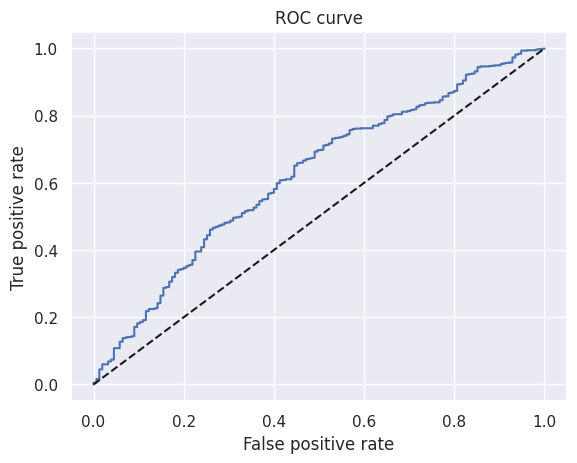

In [ ]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [ ]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.6222183888218045

### **Gini and Kolmogorov-Smirnov**

In [ ]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')
# Sorts a dataframe by the values of a specific column.

In [ ]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
806,1,0.546772,0
343,0,0.579967,0
945,1,0.582768,0
52,0,0.597672,0
1039,1,0.615710,0


In [ ]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
# We reset the index of a dataframe and overwrite it.

In [ ]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,806,1,0.546772,0
1,343,0,0.579967,0
2,945,1,0.582768,0
3,52,0,0.597672,0
4,1039,1,0.615710,0


In [ ]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in ython starts from 0, we add 1 to each index.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'bad', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.

In [ ]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,806,1,0.546772,0,1,1,0
1,343,0,0.579967,0,2,1,1
2,945,1,0.582768,0,3,2,1
3,52,0,0.597672,0,4,2,2
4,1039,1,0.615710,0,5,3,2


In [ ]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
# We calculate the cumulative percentage of 'bad'.

In [ ]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,806,1,0.546772,0,1,1,0,0.000917,0.001070,0.000000
1,343,0,0.579967,0,2,1,1,0.001835,0.001070,0.006452
2,945,1,0.582768,0,3,2,1,0.002752,0.002139,0.006452
3,52,0,0.597672,0,4,2,2,0.003670,0.002139,0.012903
4,1039,1,0.615710,0,5,3,2,0.004587,0.003209,0.012903


Text(0.5, 1.0, 'Gini')

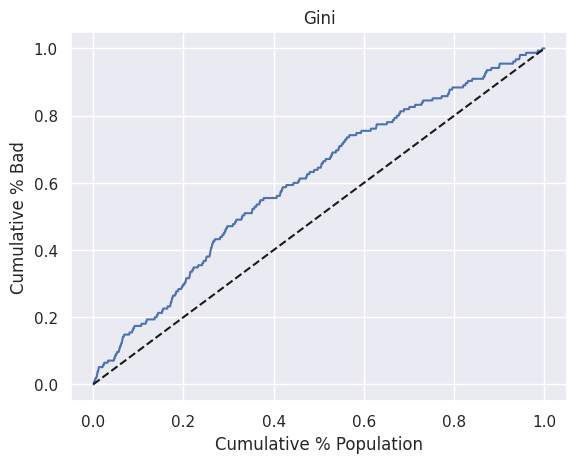

In [ ]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

In [ ]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini

0.24443677764360894

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

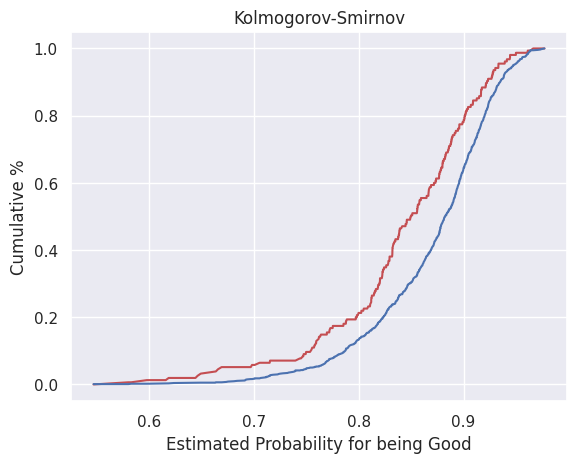

In [ ]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')
# We name the graph "Kolmogorov-Smirnov".

In [ ]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.2072106261859582

# **Applying the PD Model**

## **Calculating PD of individual accounts**

In [ ]:
df_inputs_test.shape

(1090, 69)

In [ ]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.355555,NaN
1,product_interest:23EE2CC4_D25BB6AD_DKL1B23A_DC...,0.103341,0.567373
2,product_interest:D6A56A35,0.177009,0.340856
3,product_interest:B2D3E1CC,-0.389788,0.206589
4,product_purpose:agriculture_production_for_sale,0.390991,0.013328
5,product_purpose:other_purposes,0.450151,0.035919
6,harvest_cycles_per_year:6-0-5-7-11,0.475342,0.095228
7,harvest_cycles_per_year:1,0.161473,0.312920
8,harvest_cycles_per_year:4,0.096502,0.626591
9,harvest_cycles_per_year:3,-0.040960,0.736525


In [ ]:
# dropCols=['average_monthly_income:10800-16900', 'credit_sale:<=79037', 'deposit:> 9500', 'expected_amount:3599.5-4149.5', 'farm_inputs:>12250',
#           'harvest_cycles_per_year:10-8-12-2', 'other_water_source:river_tap_borehole', 'percentage_who_default:60%-100%',
#           'product_purpose:increase_agriculture_production_for_self_consumption','pumping_cost:< 350']


In [ ]:
y_hat_test_proba

array([0.84882578, 0.94652394, 0.83265246, ..., 0.86292265, 0.77597704,
       0.84998401])

## **Creating a Scorecard**

In [ ]:
ref_categories = ['machinery_ownership:common_use_without_cost', 'percentage_who_pay_suppliers_on_time:60%-80%', 'occupation_length:1-5_years','salary_amount:1025-26500',
                  'county_residence:02C5_4768_3A8ED_EE0D_1B21_9D1F_3275_9C21_753C', 'product_interest:DB17CEE2_OK54BBC3_52C7EA5C_2A9326CC',  'financial_dependants:7_0_9_13',
                  'pensioners:0', 'other_expense:>45500', 'balance:>128984', 'birth_date:< 30 years', 'total_outstanding_loan:14500-79500', 'net_credit:< 78963',
                 'installment_amount:3600-4200', 'remaining_income:< 10000']

In [ ]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
# We create a new dataframe with one column. Its values are the values from the 'reference_categories' list.
# We name it 'Feature name'.
df_ref_categories['Coefficients'] = 0
# We create a second column, called 'Coefficients', which contains only 0 values.
df_ref_categories['p_values'] = np.nan
# We create a third column, called 'p_values', with contains only NaN values.
df_ref_categories

,Feature name,Coefficients,p_values
0,machinery_ownership:common_use_without_cost,0,NaN
1,percentage_who_pay_suppliers_on_time:60%-80%,0,NaN
2,occupation_length:1-5_years,0,NaN
3,salary_amount:1025-26500,0,NaN
4,county_residence:02C5_4768_3A8ED_EE0D_1B21_9D1...,0,NaN
5,product_interest:DB17CEE2_OK54BBC3_52C7EA5C_2A...,0,NaN
6,financial_dependants:7_0_9_13,0,NaN
7,pensioners:0,0,NaN
8,other_expense:>45500,0,NaN
9,balance:>128984,0,NaN


In [ ]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
# Concatenates two dataframes.
df_scorecard = df_scorecard.reset_index()
# We reset the index of a dataframe.
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-0.355555,NaN
1,1,product_interest:23EE2CC4_D25BB6AD_DKL1B23A_DC...,0.103341,0.567373
2,2,product_interest:D6A56A35,0.177009,0.340856
3,3,product_interest:B2D3E1CC,-0.389788,0.206589
4,4,product_purpose:agriculture_production_for_sale,0.390991,0.013328
5,5,product_purpose:other_purposes,0.450151,0.035919
6,6,harvest_cycles_per_year:6-0-5-7-11,0.475342,0.095228
7,7,harvest_cycles_per_year:1,0.161473,0.312920
8,8,harvest_cycles_per_year:4,0.096502,0.626591
9,9,harvest_cycles_per_year:3,-0.040960,0.736525


In [ ]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
# We create a new column, called 'Original feature name', which contains the value of the 'Feature name' column,
# up to the column symbol.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-0.355555,NaN,Intercept
1,1,product_interest:23EE2CC4_D25BB6AD_DKL1B23A_DC...,0.103341,0.567373,product_interest
2,2,product_interest:D6A56A35,0.177009,0.340856,product_interest
3,3,product_interest:B2D3E1CC,-0.389788,0.206589,product_interest
4,4,product_purpose:agriculture_production_for_sale,0.390991,0.013328,product_purpose
5,5,product_purpose:other_purposes,0.450151,0.035919,product_purpose
6,6,harvest_cycles_per_year:6-0-5-7-11,0.475342,0.095228,harvest_cycles_per_year
7,7,harvest_cycles_per_year:1,0.161473,0.312920,harvest_cycles_per_year
8,8,harvest_cycles_per_year:4,0.096502,0.626591,harvest_cycles_per_year
9,9,harvest_cycles_per_year:3,-0.040960,0.736525,harvest_cycles_per_year


In [ ]:
#set min and max score
min_score = 300
max_score = 850

In [ ]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.

,Coefficients
Original feature name,
Intercept,-0.355555
Netincome2.3,-0.634648
Product,0.064099
average_monthly_income,0.184134
balance,0.000000
birth_date,0.000000
county_residence,0.000000
duration_with_same_employer,0.014291
family_descision_maker,0.151821


In [ ]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
# Up to the 'min()' method everything is the same as in the line above.
# Then, we aggregate further and sum all the minimum values.
min_sum_coef

-1.4592747145686507

In [ ]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.

,Coefficients
Original feature name,
Intercept,-0.355555
Netincome2.3,0.011344
Product,0.457514
average_monthly_income,0.543084
balance,0.000000
birth_date,0.000000
county_residence,0.000000
duration_with_same_employer,0.584274
family_descision_maker,0.517633


In [ ]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the maximum values.
max_sum_coef

6.69070631346562

In [ ]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
# We multiply the value of the 'Coefficients' column by the ration of the differences between
# maximum score and minimum score and maximum sum of coefficients and minimum sum of cefficients.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-0.355555,NaN,Intercept,-23.994585
1,1,product_interest:23EE2CC4_D25BB6AD_DKL1B23A_DC...,0.103341,0.567373,product_interest,6.973925
2,2,product_interest:D6A56A35,0.177009,0.340856,product_interest,11.945413
3,3,product_interest:B2D3E1CC,-0.389788,0.206589,product_interest,-26.304791
4,4,product_purpose:agriculture_production_for_sale,0.390991,0.013328,product_purpose,26.385983
5,5,product_purpose:other_purposes,0.450151,0.035919,product_purpose,30.378380
6,6,harvest_cycles_per_year:6-0-5-7-11,0.475342,0.095228,harvest_cycles_per_year,32.078403
7,7,harvest_cycles_per_year:1,0.161473,0.312920,harvest_cycles_per_year,10.897007
8,8,harvest_cycles_per_year:4,0.096502,0.626591,harvest_cycles_per_year,6.512392
9,9,harvest_cycles_per_year:3,-0.040960,0.736525,harvest_cycles_per_year,-2.764174


In [ ]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
# We divide the difference of the value of the 'Coefficients' column and the minimum sum of coefficients by
# the difference of the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we multiply that by the difference between the maximum score and the minimum score.
# Then, we add minimum score.
df_scorecard

<ipython-input-101-6383eee17b30>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_sco

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-0.355555,NaN,Intercept,374.484306
1,1,product_interest:23EE2CC4_D25BB6AD_DKL1B23A_DC...,0.103341,0.567373,product_interest,6.973925
2,2,product_interest:D6A56A35,0.177009,0.340856,product_interest,11.945413
3,3,product_interest:B2D3E1CC,-0.389788,0.206589,product_interest,-26.304791
4,4,product_purpose:agriculture_production_for_sale,0.390991,0.013328,product_purpose,26.385983
5,5,product_purpose:other_purposes,0.450151,0.035919,product_purpose,30.378380
6,6,harvest_cycles_per_year:6-0-5-7-11,0.475342,0.095228,harvest_cycles_per_year,32.078403
7,7,harvest_cycles_per_year:1,0.161473,0.312920,harvest_cycles_per_year,10.897007
8,8,harvest_cycles_per_year:4,0.096502,0.626591,harvest_cycles_per_year,6.512392
9,9,harvest_cycles_per_year:3,-0.040960,0.736525,harvest_cycles_per_year,-2.764174


In [ ]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
# We round the values of the 'Score - Calculation' column.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-0.355555,NaN,Intercept,374.484306,374.0
1,1,product_interest:23EE2CC4_D25BB6AD_DKL1B23A_DC...,0.103341,0.567373,product_interest,6.973925,7.0
2,2,product_interest:D6A56A35,0.177009,0.340856,product_interest,11.945413,12.0
3,3,product_interest:B2D3E1CC,-0.389788,0.206589,product_interest,-26.304791,-26.0
4,4,product_purpose:agriculture_production_for_sale,0.390991,0.013328,product_purpose,26.385983,26.0
5,5,product_purpose:other_purposes,0.450151,0.035919,product_purpose,30.378380,30.0
6,6,harvest_cycles_per_year:6-0-5-7-11,0.475342,0.095228,harvest_cycles_per_year,32.078403,32.0
7,7,harvest_cycles_per_year:1,0.161473,0.312920,harvest_cycles_per_year,10.897007,11.0
8,8,harvest_cycles_per_year:4,0.096502,0.626591,harvest_cycles_per_year,6.512392,7.0
9,9,harvest_cycles_per_year:3,-0.040960,0.736525,harvest_cycles_per_year,-2.764174,-3.0


In [ ]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

298.0

In [ ]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

847.0

*1 has to be subtracted from the maximum score for one original variable. Which one? We'll evaluate based on differences.*

In [ ]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,-0.355555,NaN,Intercept,374.484306,374.0,-0.484306
1,1,product_interest:23EE2CC4_D25BB6AD_DKL1B23A_DC...,0.103341,0.567373,product_interest,6.973925,7.0,0.026075
2,2,product_interest:D6A56A35,0.177009,0.340856,product_interest,11.945413,12.0,0.054587
3,3,product_interest:B2D3E1CC,-0.389788,0.206589,product_interest,-26.304791,-26.0,0.304791
4,4,product_purpose:agriculture_production_for_sale,0.390991,0.013328,product_purpose,26.385983,26.0,-0.385983
5,5,product_purpose:other_purposes,0.450151,0.035919,product_purpose,30.378380,30.0,-0.378380
6,6,harvest_cycles_per_year:6-0-5-7-11,0.475342,0.095228,harvest_cycles_per_year,32.078403,32.0,-0.078403
7,7,harvest_cycles_per_year:1,0.161473,0.312920,harvest_cycles_per_year,10.897007,11.0,0.102993
8,8,harvest_cycles_per_year:4,0.096502,0.626591,harvest_cycles_per_year,6.512392,7.0,0.487608
9,9,harvest_cycles_per_year:3,-0.040960,0.736525,harvest_cycles_per_year,-2.764174,-3.0,-0.235826


In [ ]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][24] = 3 #max
df_scorecard['Score - Final'][39] = 13 #min
df_scorecard

<ipython-input-106-bd89db54c1b6>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_scorecard['Score - Final'][24] = 3 #max
<ipython-input-106-bd89db54c1b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-0.355555,NaN,Intercept,374.484306,374.0,-0.484306,374.0
1,1,product_interest:23EE2CC4_D25BB6AD_DKL1B23A_DC...,0.103341,0.567373,product_interest,6.973925,7.0,0.026075,7.0
2,2,product_interest:D6A56A35,0.177009,0.340856,product_interest,11.945413,12.0,0.054587,12.0
3,3,product_interest:B2D3E1CC,-0.389788,0.206589,product_interest,-26.304791,-26.0,0.304791,-26.0
4,4,product_purpose:agriculture_production_for_sale,0.390991,0.013328,product_purpose,26.385983,26.0,-0.385983,26.0
5,5,product_purpose:other_purposes,0.450151,0.035919,product_purpose,30.378380,30.0,-0.378380,30.0
6,6,harvest_cycles_per_year:6-0-5-7-11,0.475342,0.095228,harvest_cycles_per_year,32.078403,32.0,-0.078403,32.0
7,7,harvest_cycles_per_year:1,0.161473,0.312920,harvest_cycles_per_year,10.897007,11.0,0.102993,11.0
8,8,harvest_cycles_per_year:4,0.096502,0.626591,harvest_cycles_per_year,6.512392,7.0,0.487608,7.0
9,9,harvest_cycles_per_year:3,-0.040960,0.736525,harvest_cycles_per_year,-2.764174,-3.0,-0.235826,-3.0


In [ ]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

311.0

In [ ]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

849.0

## **Calculating Credit Score**

In [ ]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-0.355555,NaN,Intercept,374.484306,374.0,-0.484306,374.0
1,1,product_interest:23EE2CC4_D25BB6AD_DKL1B23A_DC...,0.103341,0.567373,product_interest,6.973925,7.0,0.026075,7.0
2,2,product_interest:D6A56A35,0.177009,0.340856,product_interest,11.945413,12.0,0.054587,12.0
3,3,product_interest:B2D3E1CC,-0.389788,0.206589,product_interest,-26.304791,-26.0,0.304791,-26.0
4,4,product_purpose:agriculture_production_for_sale,0.390991,0.013328,product_purpose,26.385983,26.0,-0.385983,26.0
5,5,product_purpose:other_purposes,0.450151,0.035919,product_purpose,30.378380,30.0,-0.378380,30.0
6,6,harvest_cycles_per_year:6-0-5-7-11,0.475342,0.095228,harvest_cycles_per_year,32.078403,32.0,-0.078403,32.0
7,7,harvest_cycles_per_year:1,0.161473,0.312920,harvest_cycles_per_year,10.897007,11.0,0.102993,11.0
8,8,harvest_cycles_per_year:4,0.096502,0.626591,harvest_cycles_per_year,6.512392,7.0,0.487608,7.0
9,9,harvest_cycles_per_year:3,-0.040960,0.736525,harvest_cycles_per_year,-2.764174,-3.0,-0.235826,-3.0


In [ ]:
inputs_test_with_ref_cat_w_intercept =  inputs_test

In [ ]:
inputs_test_with_ref_cat_w_intercept.shape

(1090, 175)

In [ ]:
test_with_ref_cat = inputs_test

test_with_ref_cat.to_csv("inputs_test")

In [ ]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
# We insert a column in the dataframe, with an index of 0, that is, in the beginning of the dataframe.
# The name of that column is 'Intercept', and its values are 1s.

In [ ]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,county_residence:03F2_D216_CA19_7537_2AEB_6FB4_0B9E_64A0_8AFB_17CC,county_residence:4D57_A680_74ED_560E_D066_ADBC_2949,county_residence:Nairobi_A12D2A4F,county_residence:D405B9C8_B4B262CE_ECD698D0_7F919359,county_residence:59574EDD_28D4629E_3573C4DF,county_residence:8F4C_685B_072D_CD4D_5399_4CC1_B0F3_E953_2491,county_residence:02C5_4768_3A8ED_EE0D_1B21_9D1F_3275_9C21_753C,product_interest:23EE2CC4_D25BB6AD_DKL1B23A_DC12EF21_AF60B098,product_interest:D6A56A35,...,farm_inputs:4450-5450,farm_inputs:5450-12250,farm_inputs:>12250,other_expense:0-5,other_expense:5-4999.50,other_expense:4999.50-9200,other_expense:9200-27500,other_expense:27500-45500,other_expense:>45500,other_water_source:borehole
0,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0
4,1,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0


In [ ]:
#inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
# Here, from the 'inputs_test_with_ref_cat_w_intercept' dataframe, we keep only the columns with column names,
# exactly equal to the row values of the 'Feature name' column from the 'df_scorecard' dataframe.

In [ ]:
# Get the common columns between the two DataFrames
common_columns = list(set(df_scorecard['Feature name'].values) & set(inputs_test_with_ref_cat_w_intercept.columns))

# Filter the 'inputs_test_with_ref_cat_w_intercept' DataFrame using the common columns
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[common_columns]

In [ ]:
inputs_test_with_ref_cat_w_intercept.head()

,netincome2_salary:-6.28 - 7.82,netincome2_business:23.90-40.17,Netincome2.3:>117.15,no_of_loans:0 loans,remaining_payment_months:7.5-17.50,fruits_vegetables_grown:2 types_of_fruits,netincome1_business:40.85-75.04,other_water_source:borehole,netincome2_salary:38.90 - 57.49,total_outstanding_loan:14500-79500,...,Product:Climate Smart Direct,family_descision_maker:wife,duration_with_same_employer:more_than_5_years,harvest_cycles_per_year:3,Netincome2.3:<=90.21,harvest_cycles_per_year:1,financial_dependants:7_0_9_13,rent:>300,netincome1_business:15.84-40.85,netincome1.3:<=15.89
0,0,0,0,1,0,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,1,1,1,0,0,1
2,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
inputs_test_with_ref_cat_w_intercept.shape

(1090, 81)

In [ ]:
scorecard_scores = df_scorecard['Score - Final']

In [ ]:
scorecard_scores.shape

(85,)

In [ ]:
scorecard_scores = scorecard_scores.values.reshape(75, 1)

ValueError: cannot reshape array of size 85 into shape (75,1)

In [ ]:
scorecard_scores.shape

In [ ]:
type(scorecard_scores)

In [ ]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.

In [ ]:
y_scores.head()

In [ ]:
y_scores.tail()

## **From Credit Score to PD**

In [ ]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef
# We divide the difference between the scores and the minimum score by
# the difference between the maximum score and the minimum score.
# Then, we multiply that by the difference between the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we add the minimum sum of coefficients.

In [ ]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
# Here we divide an exponent raised to sum of coefficients from score by
# an exponent raised to sum of coefficients from score plus one.
y_hat_proba_from_score.head()

In [ ]:
y_hat_test_proba[0: 5]

In [ ]:
df_actual_predicted_probs['y_hat_test_proba'].head()

## **Setting Cut-offs**

In [ ]:
# We need the confusion matrix again.
#np.where(np.squeeze(np.array(loan_data_targets_test)) == np.where(y_hat_test_proba >= tr, 1, 0), 1, 0).sum() / loan_data_targets_test.shape[0]
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)
#df_actual_predicted_probs['loan_data_targets_test'] == np.where(df_actual_predicted_probs['y_hat_test_proba'] >= tr, 1, 0)

In [ ]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

In [ ]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

In [ ]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [ ]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [ ]:
sns.set()

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [ ]:
thresholds

In [ ]:
thresholds.shape

In [ ]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
# We concatenate 3 dataframes along the columns.

In [ ]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
# We name the columns of the dataframe 'thresholds', 'fpr', and 'tpr'.

In [ ]:
df_cutoffs.head()

In [ ]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)
# Let the first threshold (the value of the thresholds column with index 0) be equal to a number, very close to 1
# but smaller than 1, say 1 - 1 / 10 ^ 16.

In [ ]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
# The score corresponsing to each threshold equals:
# The the difference between the natural logarithm of the ratio of the threshold and 1 minus the threshold and
# the minimum sum of coefficients
# multiplied by
# the sum of the minimum score and the ratio of the difference between the maximum score and minimum score and
# the difference between the maximum sum of coefficients and the minimum sum of coefficients.

In [ ]:
df_cutoffs.head()

In [ ]:
df_cutoffs['Score'][0] = max_score

In [ ]:
df_cutoffs.head()

In [ ]:
df_cutoffs.tail()

In [ ]:
# We define a function called 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# Thus, if given any percentage values, the function will return
# the number of rows wih estimated probabilites greater than the threshold.
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [ ]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
# Assuming that all credit applications above a given probability of being 'good' will be approved,
# when we apply the 'n_approved' function to a threshold, it will return the number of approved applications.
# Thus, here we calculate the number of approved appliations for al thresholds.
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
# Then, we calculate the number of rejected applications for each threshold.
# It is the difference between the total number of applications and the approved applications for that threshold.
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
# Approval rate equalts the ratio of the approved applications and all applications.
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']
# Rejection rate equals one minus approval rate.

In [ ]:
df_cutoffs

In [ ]:
df_cutoffs.iloc[100: 197, ]
# Here we display the dataframe with cutoffs form line with index 5000 to line with index 6200.

In [ ]:
#inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [ ]:
df_scorecard.to_csv('df_scorecard.csv')